In [1]:
!pip install pydicom
!pip install matplotlib
!pip install numpy


In [2]:
import pydicom
import os
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure


# Metadata Extraction Function

In [3]:
def extract_metadata(dicom_file):
    """Extract and categorize metadata from a DICOM file."""
    ds = pydicom.dcmread(dicom_file)
    print(ds.keys())# Return the Dataset items to simulate dict.items().
    print("PATIENT_NAME",ds.get(0x00100010))
    patient_metadata = {
        "PatientName": ds.get("PatientName", "N/A"),
        "PatientID": ds.get("PatientID", "N/A"),
        "PatientBirthDate": ds.get("PatientBirthDate", "N/A"),
        "PatientSex": ds.get("PatientSex", "N/A")
    }

    image_metadata = {
        "Modality": ds.get("Modality", "N/A"),
        "ImageType": ds.get("ImageType", "N/A"),
        "Rows": ds.get("Rows", "N/A"),
        "Columns": ds.get("Columns", "N/A"),
        "PixelSpacing": ds.get("PixelSpacing", "N/A"),
    }

    machine_metadata = {
        "Manufacturer": ds.get("Manufacturer", "N/A"),
        "InstitutionName": ds.get("InstitutionName", "N/A"),
        "DeviceSerialNumber": ds.get("DeviceSerialNumber", "N/A"),
    }

    return {
        "PatientMetadata": patient_metadata,
        "ImageMetadata": image_metadata,
        "MachineMetadata": machine_metadata
    }


# Image Visualization Function

In [4]:
def visualize_image(dicom_file):
    """Visualize the image stored in the DICOM file."""
    ds = pydicom.dcmread(dicom_file)
    
    plt.imshow(ds.pixel_array, cmap=plt.cm.gray)
    plt.title("DICOM Image")
    plt.axis('off')
    plt.show()


# Collage Creation Function

In [5]:
def create_collage(dicom_files, output_path="collage.png", cols=5, rows=5):
    """Create a collage from multiple DICOM images."""
    fig = Figure(figsize=(20, 20))
    canvas = FigureCanvas(fig)
    axarr = fig.subplots(rows, cols)

    for i, dicom_file in enumerate(dicom_files):
        if i >= rows * cols:
            break
        ds = pydicom.dcmread(dicom_file)
        axarr[i // cols, i % cols].imshow(ds.pixel_array, cmap=plt.cm.gray)
        axarr[i // cols, i % cols].axis('off')

    fig.tight_layout(pad=0)
    canvas.print_figure(output_path, bbox_inches='tight')

    plt.imshow(plt.imread(output_path))
    plt.axis('off')
    plt.show()


# TO PROCESS MULTIPLE DICOM FILES

In [13]:
def process_dicom_files(directory):
    """Process and visualize multiple DICOM files in a directory."""
    metadata_list = []
    dicom_files = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.dcm')]
    
    for dicom_file in dicom_files:
        metadata = extract_metadata(dicom_file)
        metadata_list.append(metadata)
        visualize_image(dicom_file)
    
    # Create a collage of the images
    create_collage(dicom_files)

    return metadata_list


dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9306), (0018, 9307), (0018, 9309), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 0002), (0028, 0004), (0028, 0010), (0028, 0011), (0028, 00

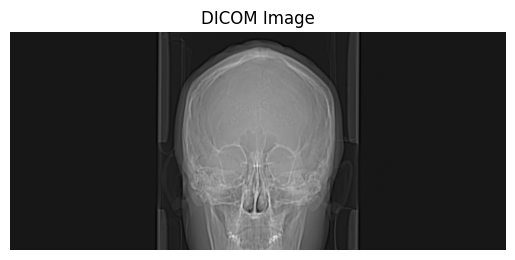

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9306), (0018, 9307), (0018, 9309), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 0002), (0028, 0004), (0028, 0010), (0028, 0011), (0028, 00

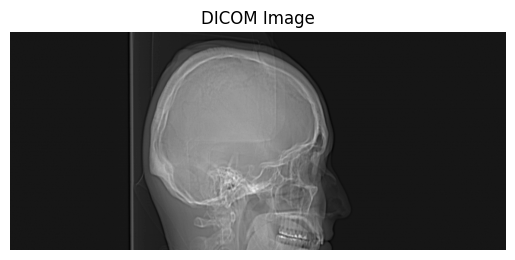

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

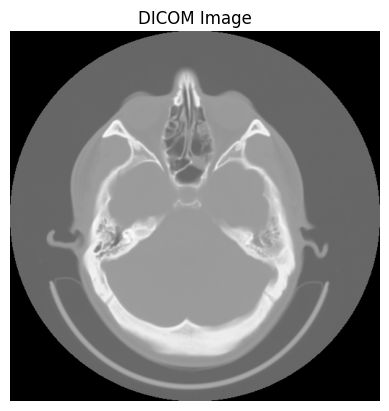

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

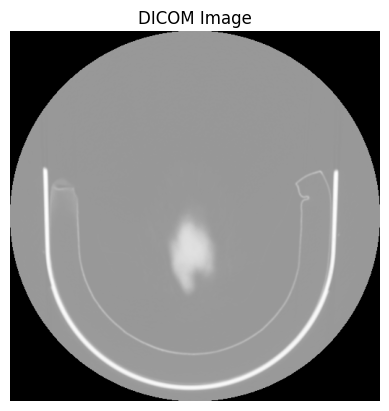

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

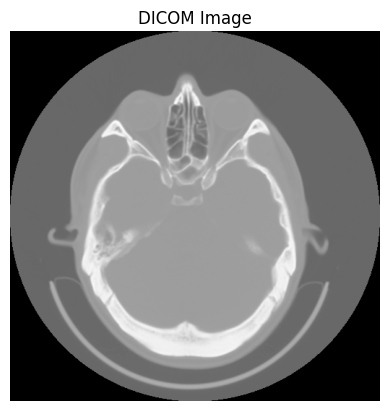

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

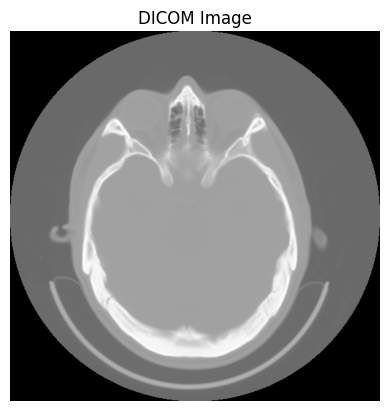

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

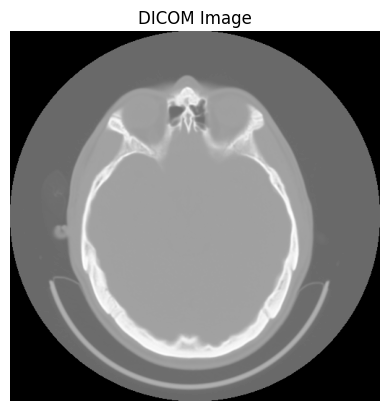

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

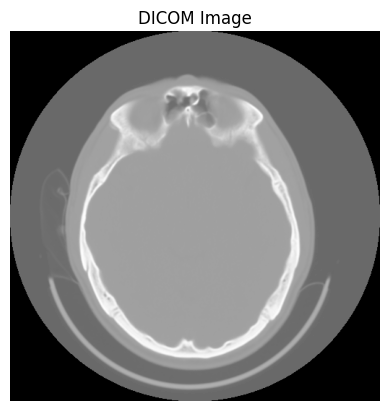

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

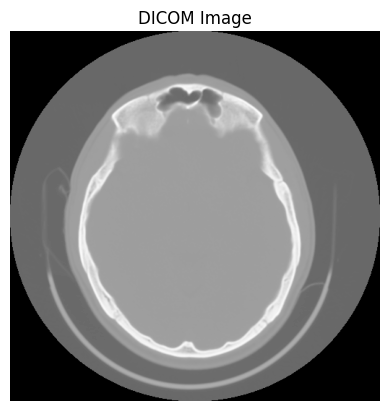

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

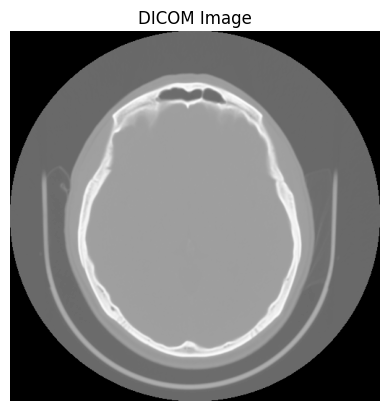

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

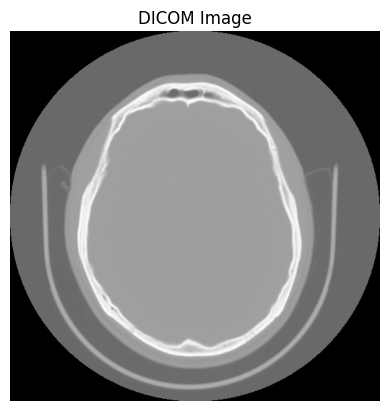

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

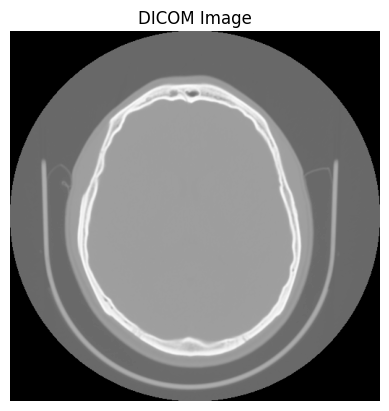

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

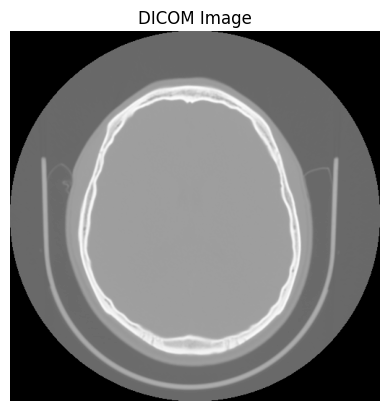

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

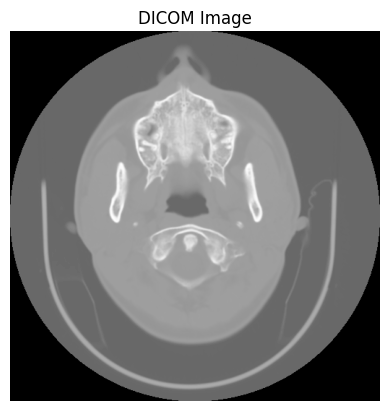

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

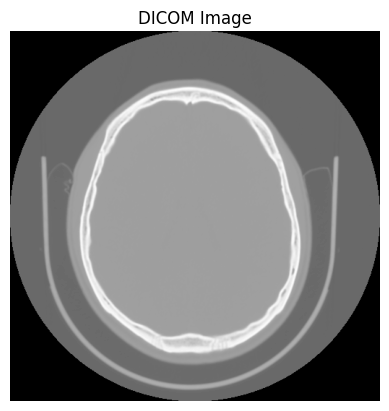

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

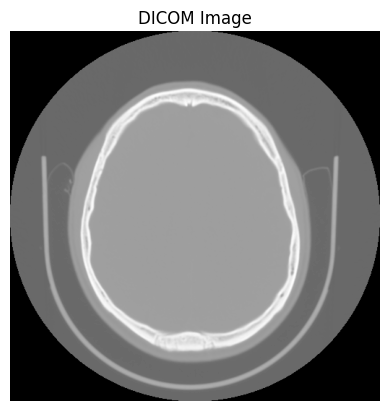

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

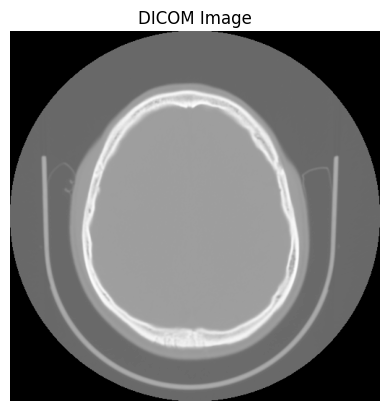

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

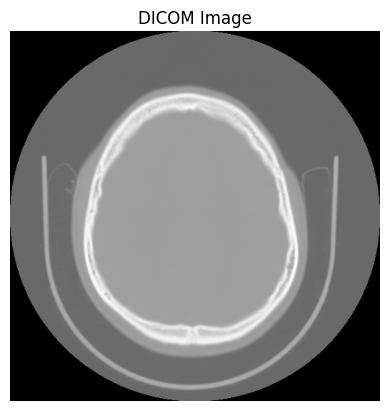

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

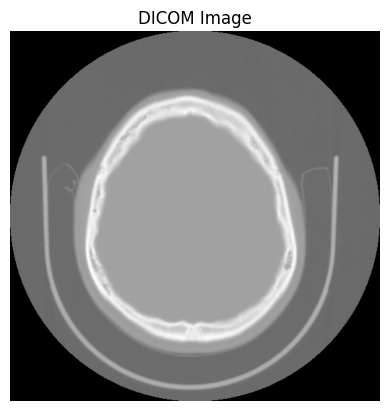

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

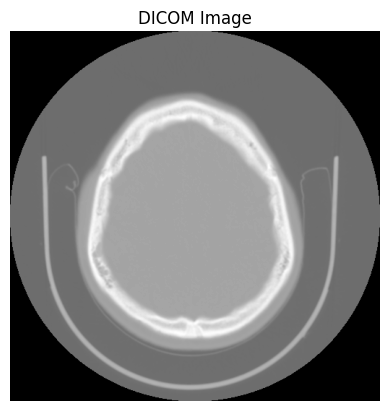

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

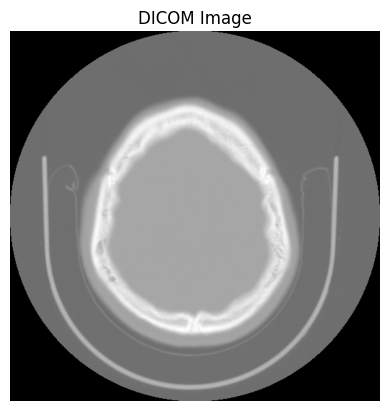

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

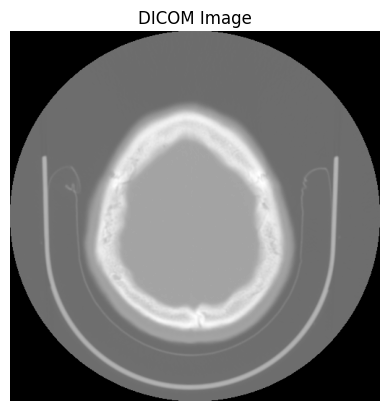

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

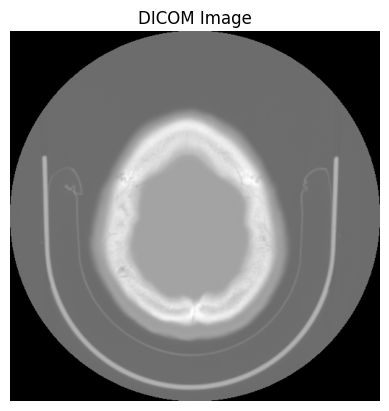

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

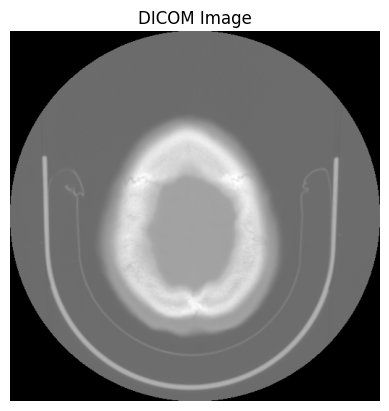

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

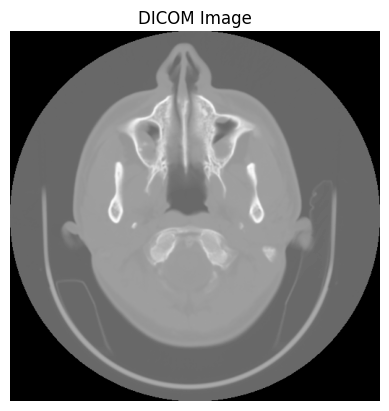

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

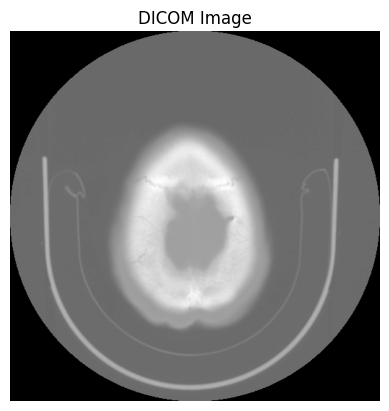

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

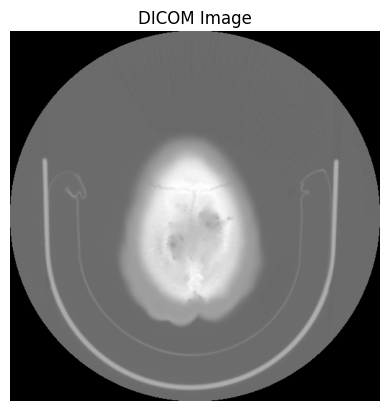

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

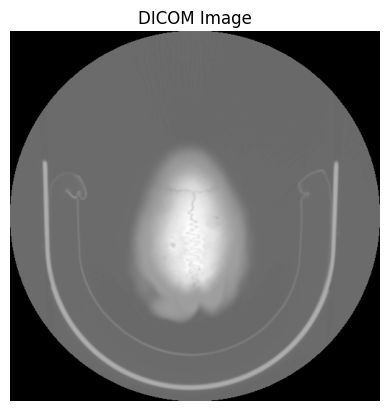

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

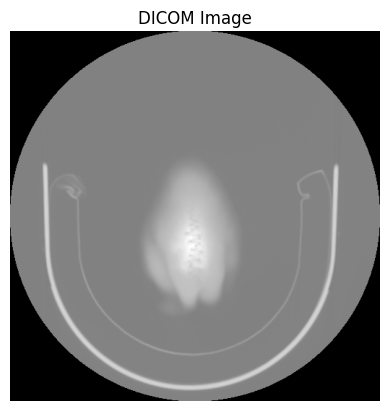

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

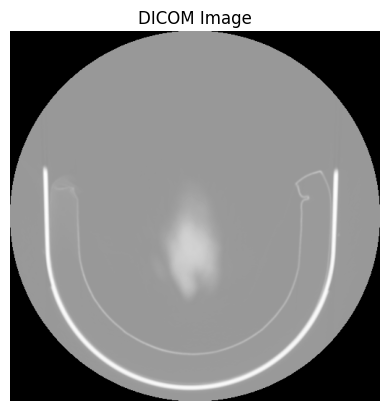

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

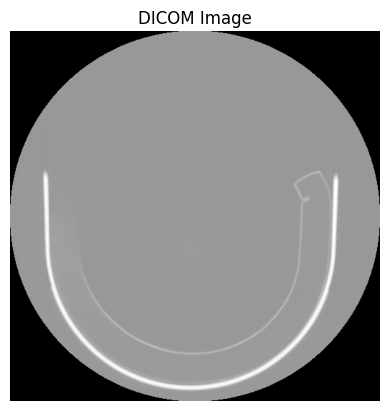

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

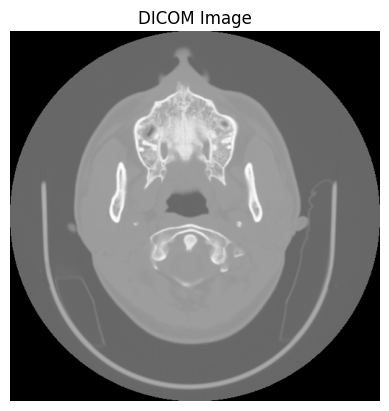

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

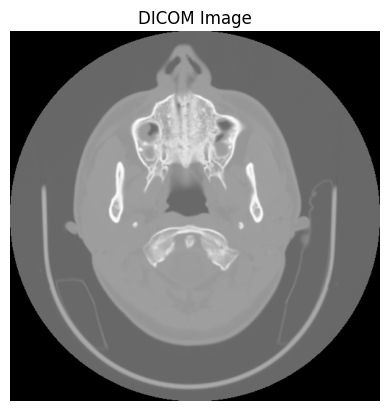

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

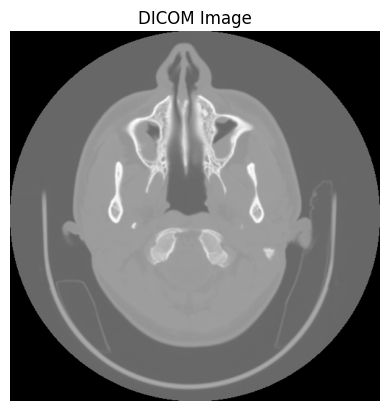

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

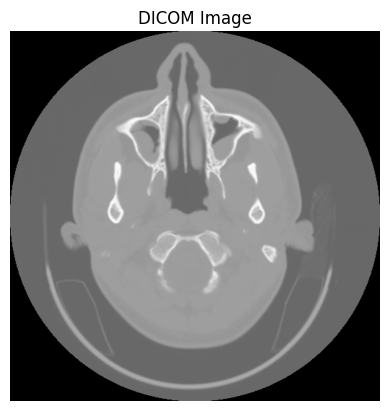

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

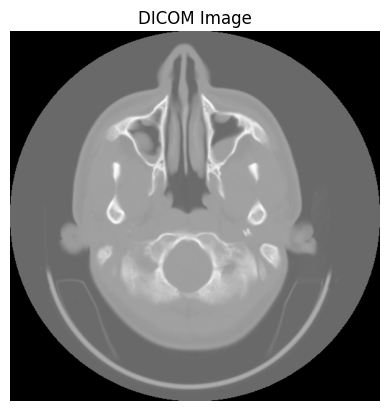

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

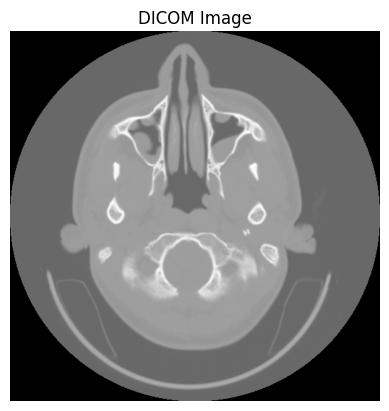

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

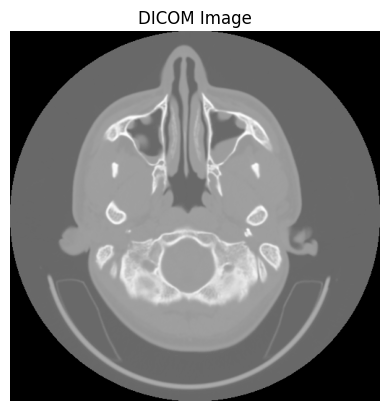

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

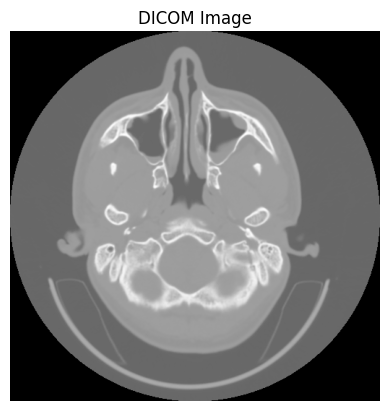

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

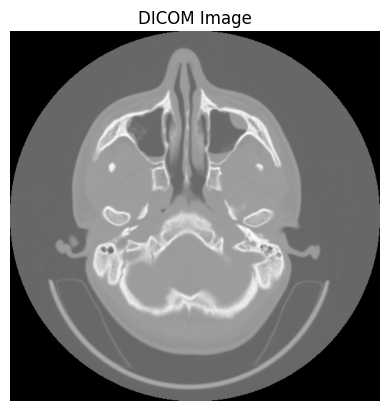

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

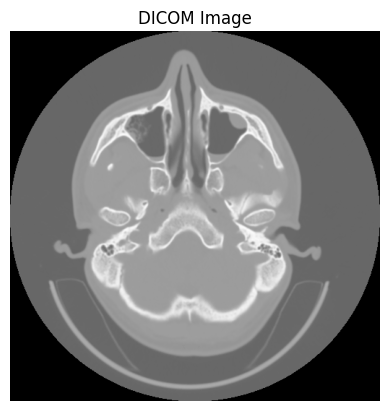

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

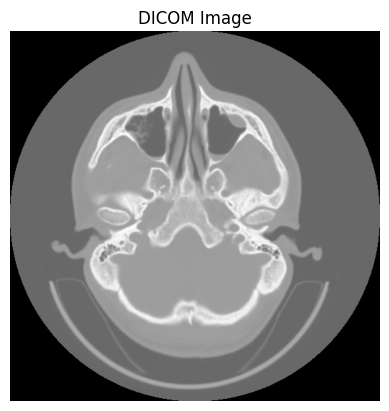

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

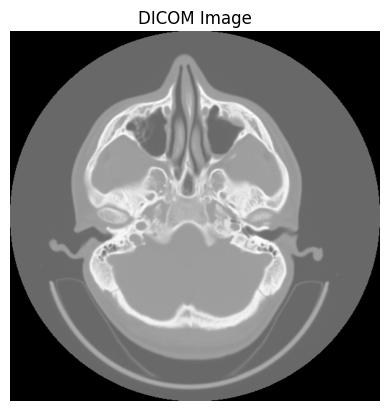

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

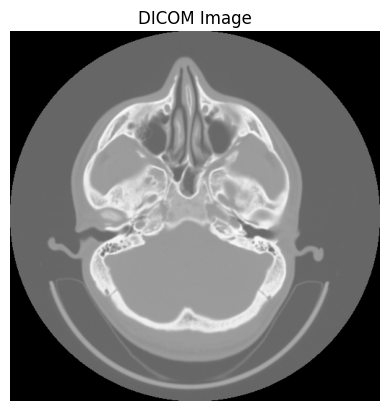

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

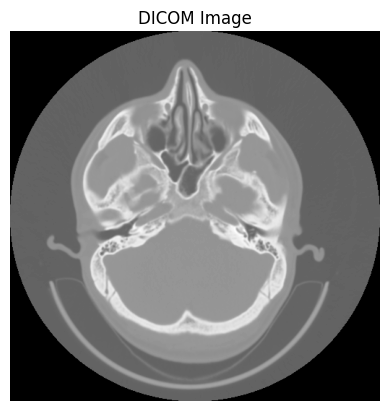

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

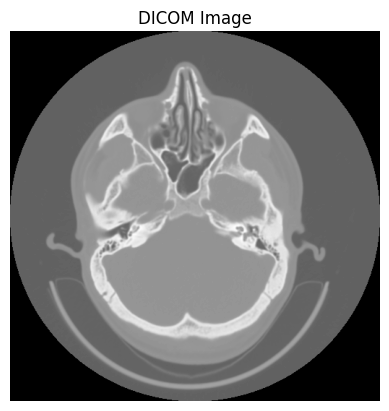

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

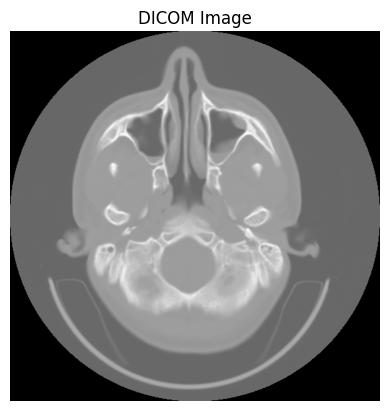

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

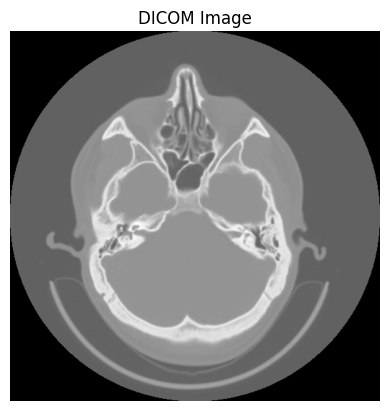

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

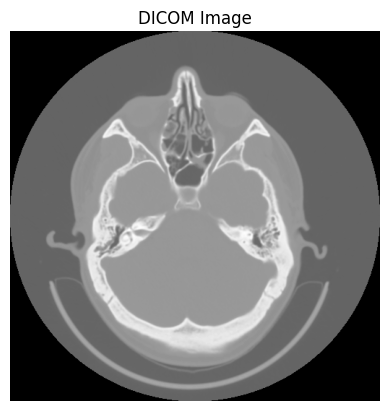

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

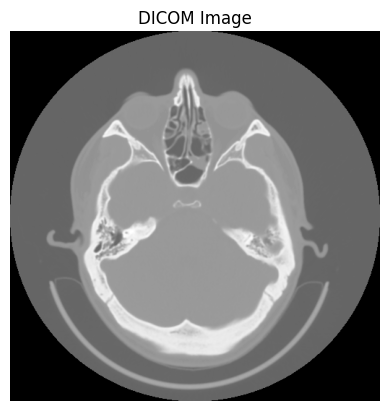

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

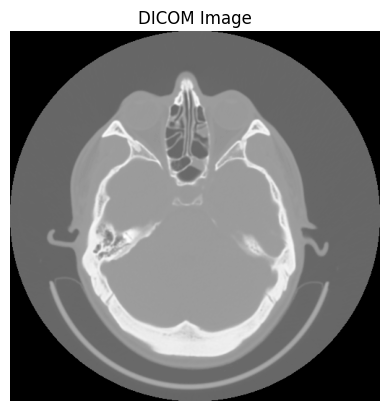

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

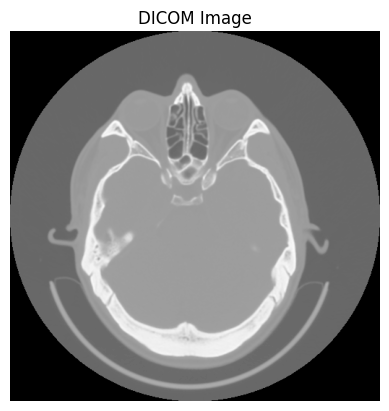

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

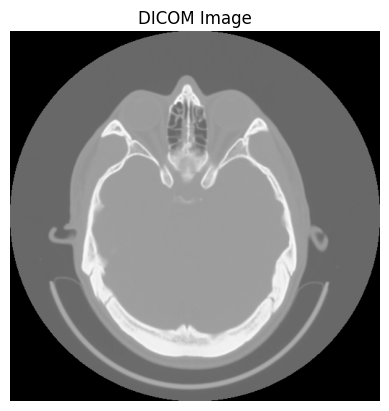

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

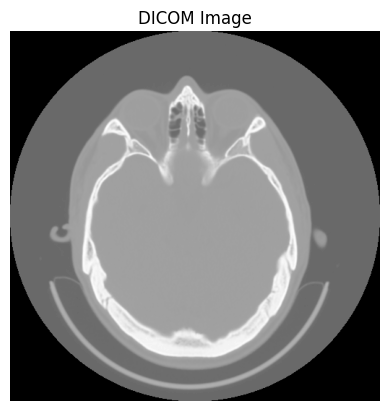

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

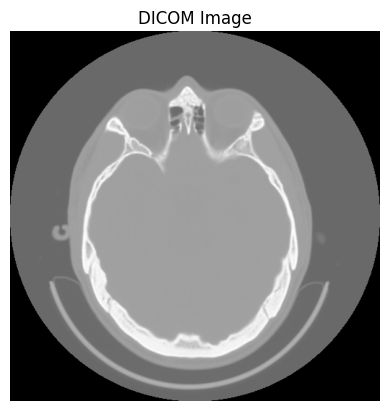

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

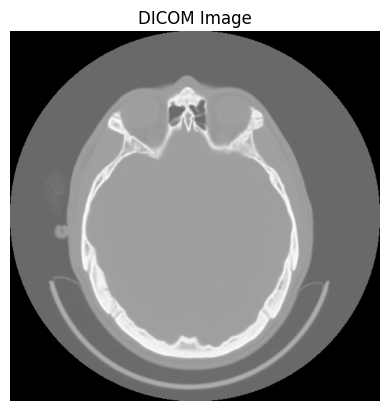

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

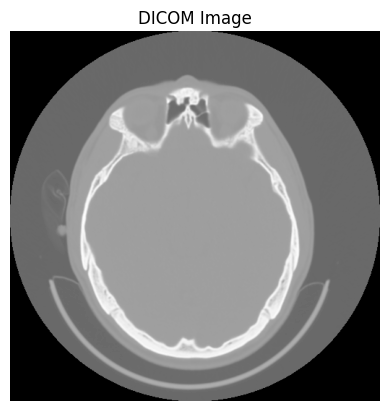

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

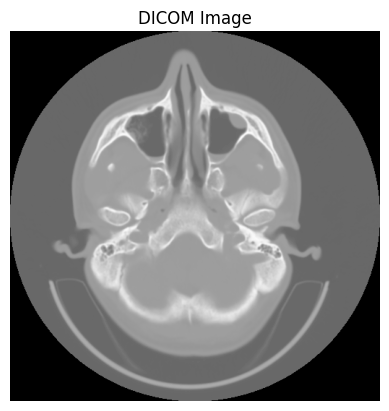

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

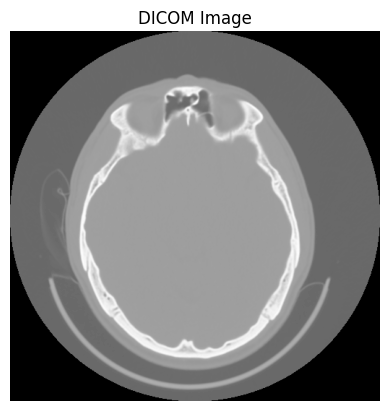

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

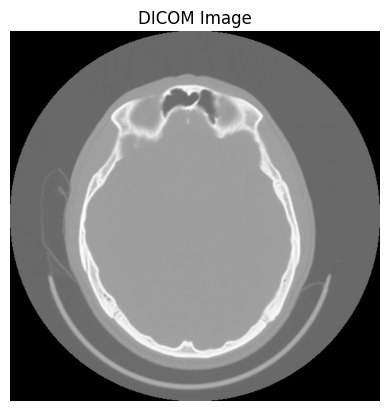

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

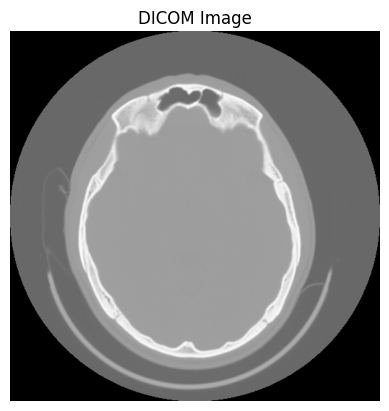

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

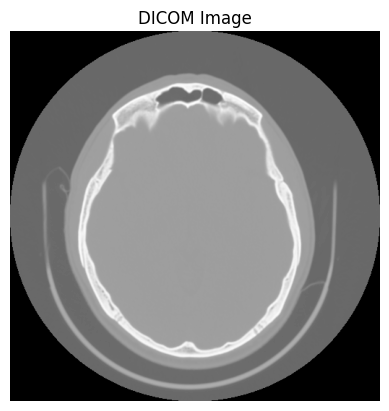

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

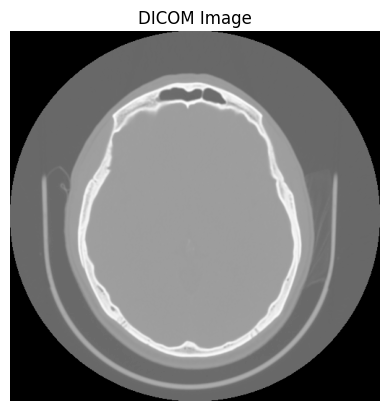

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

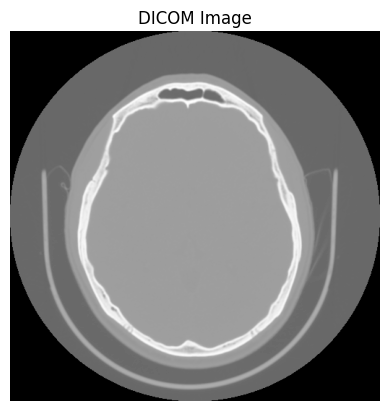

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

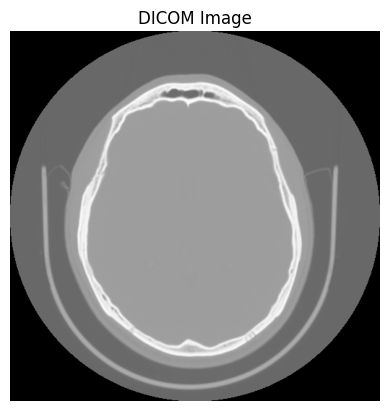

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

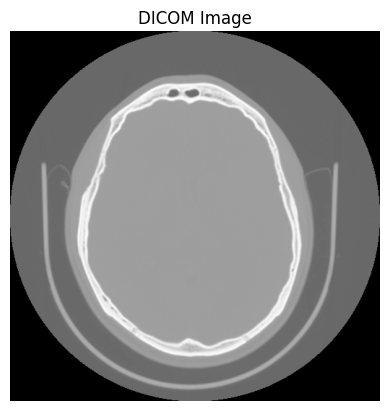

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

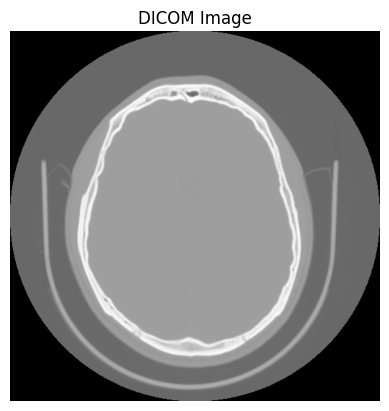

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

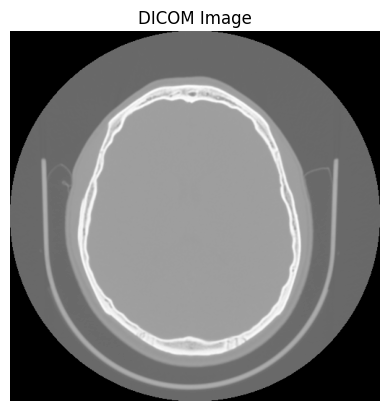

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

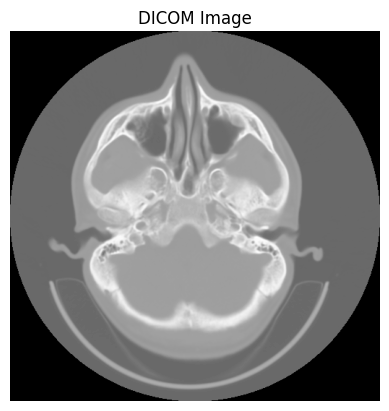

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

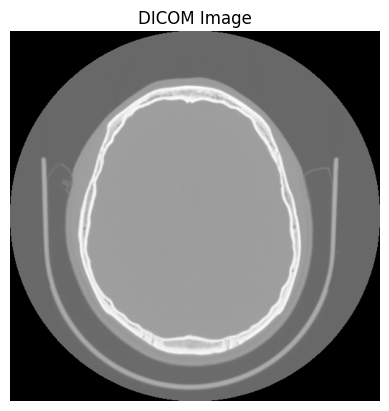

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

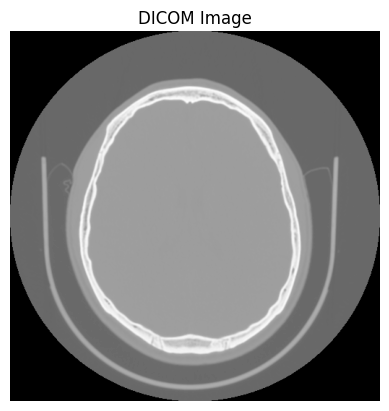

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

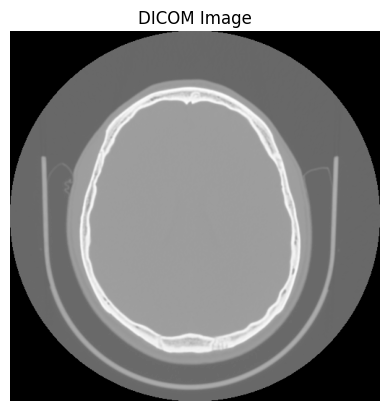

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

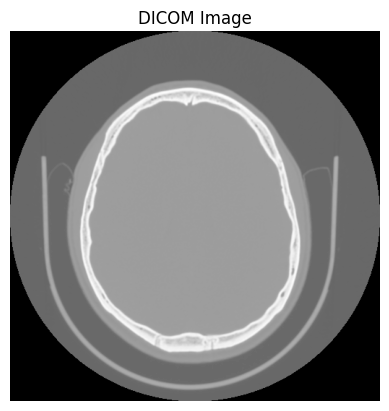

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

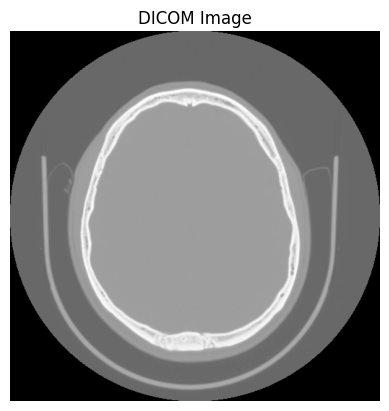

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

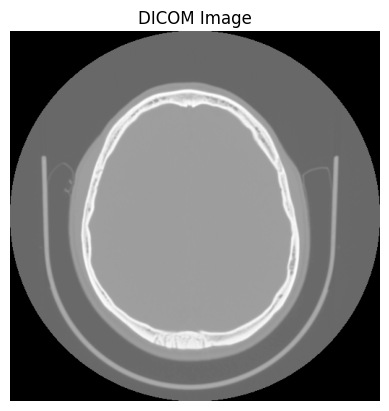

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

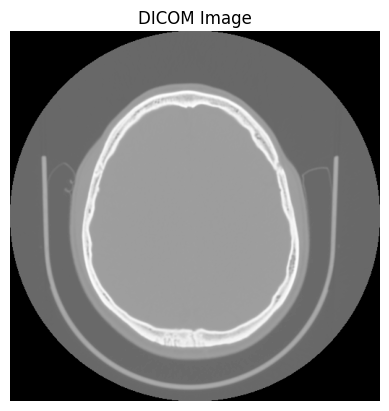

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

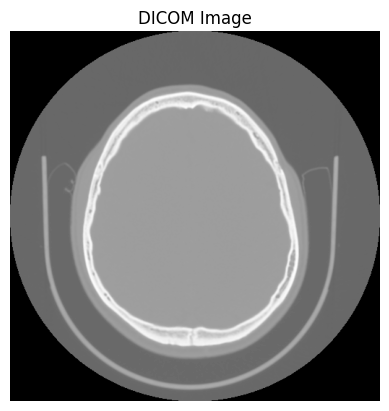

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

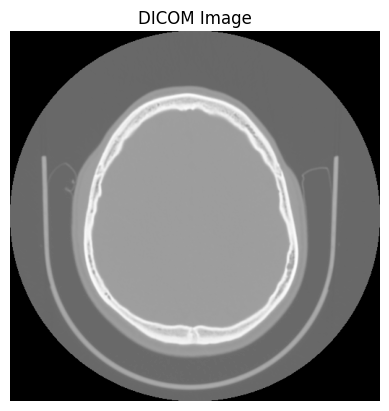

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

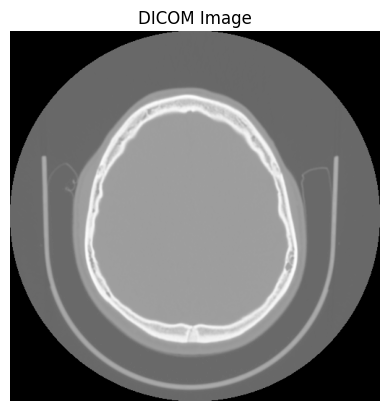

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

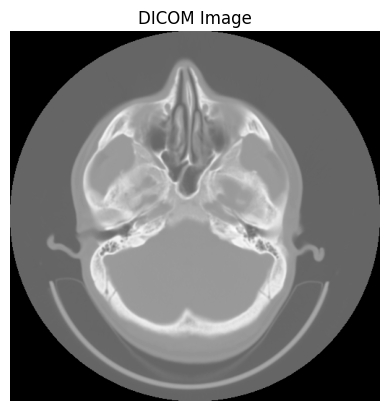

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

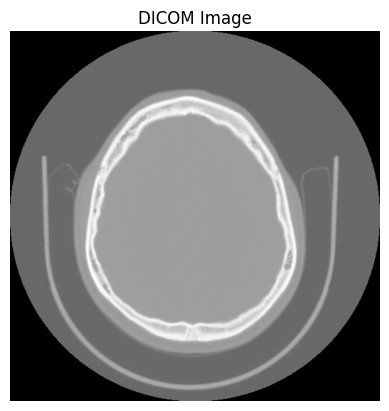

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

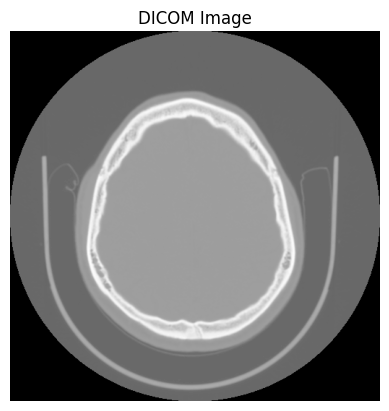

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

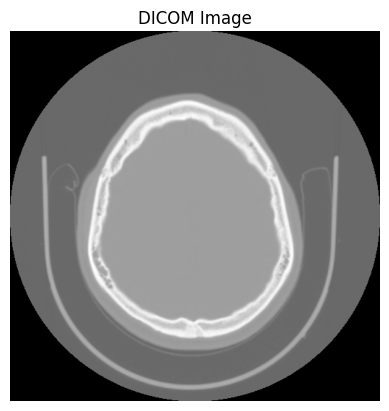

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

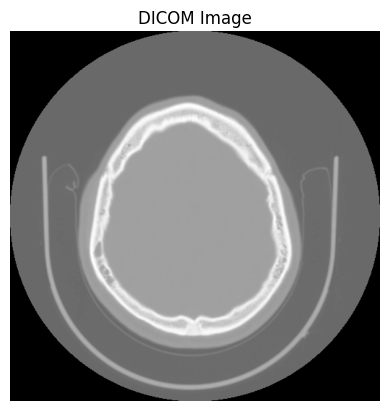

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

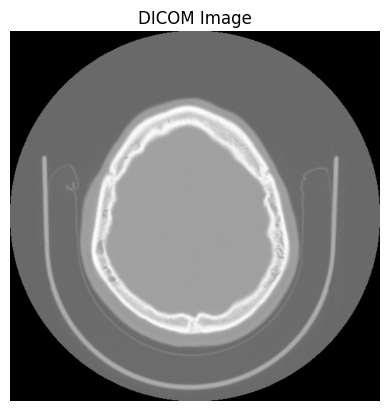

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

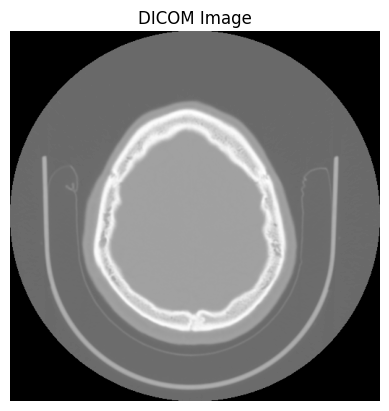

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

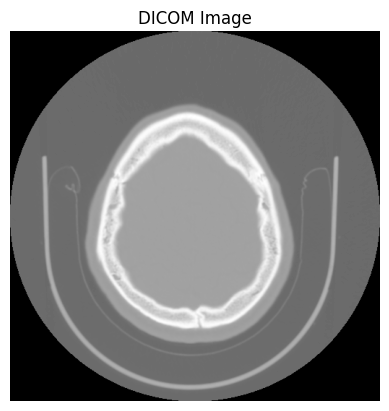

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

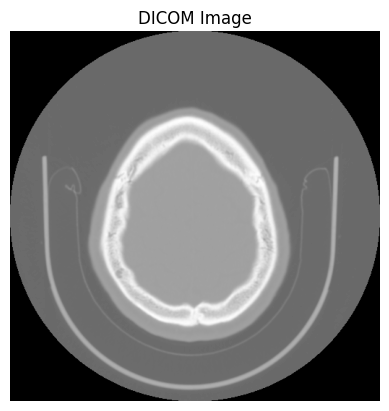

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

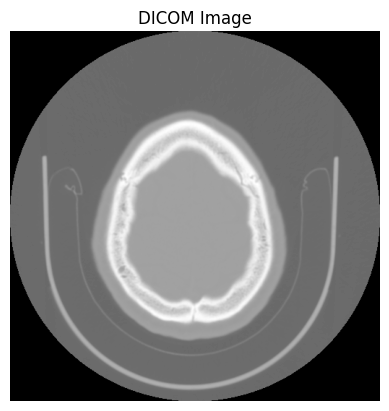

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

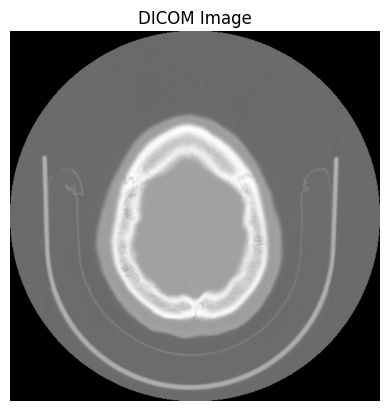

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

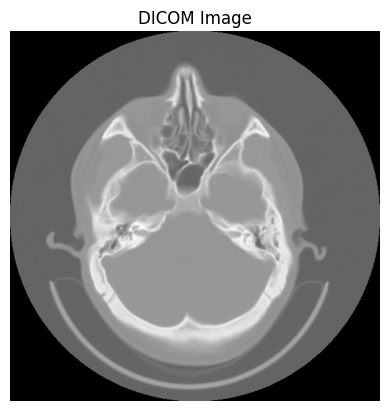

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

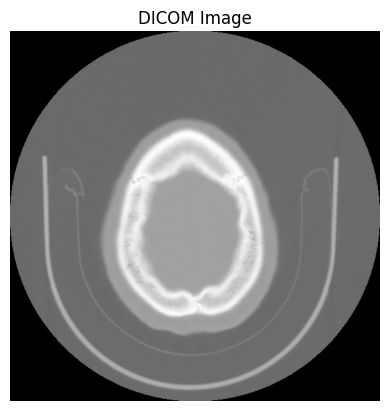

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

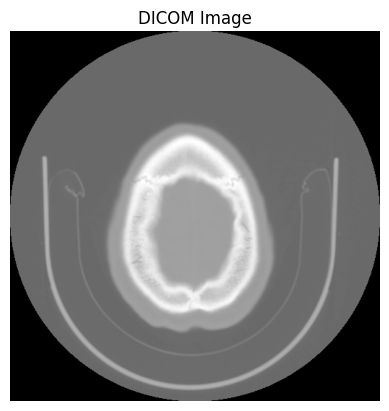

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

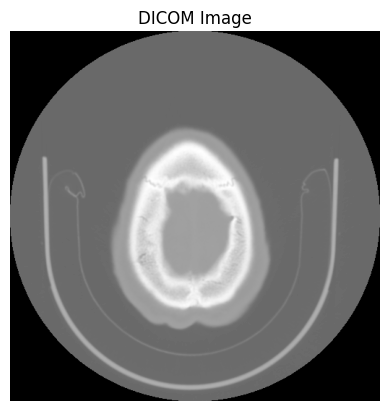

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

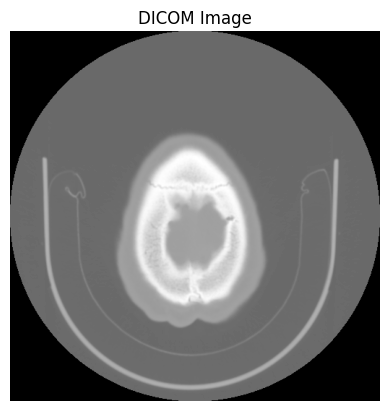

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

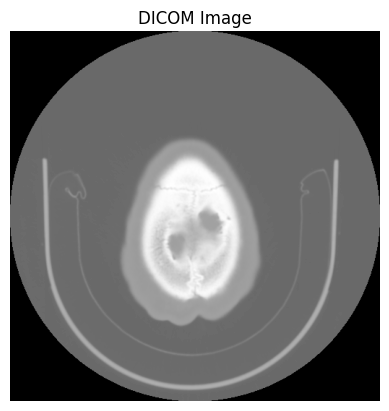

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

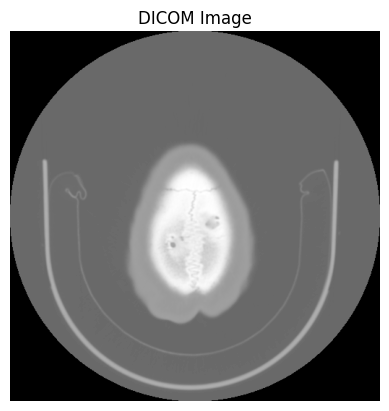

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

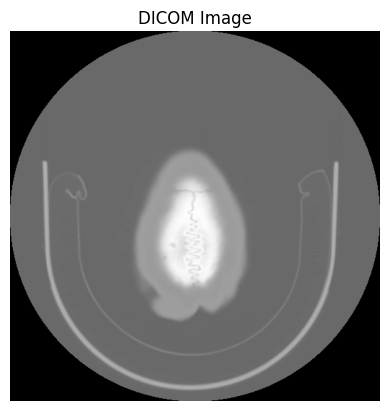

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

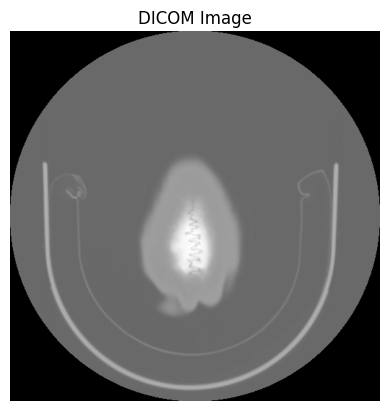

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

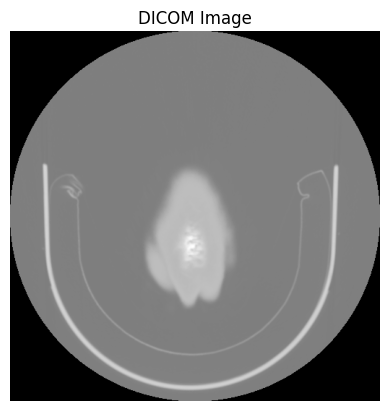

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

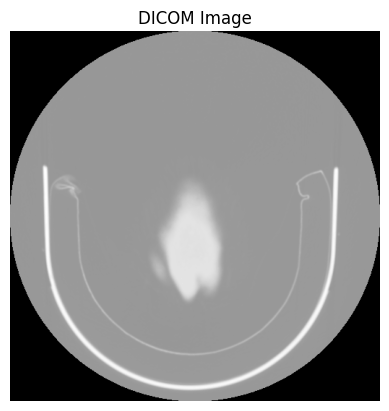

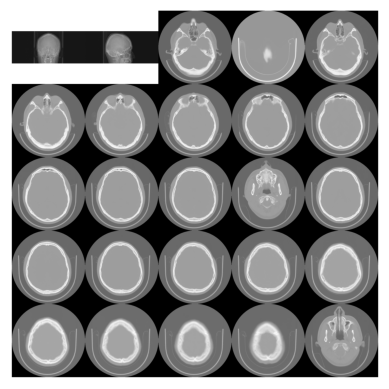

Sample Metadata:
101
[{'PatientMetadata': {'PatientName': 'NAME^NONE', 'PatientID': 'NOID', 'PatientBirthDate': '', 'PatientSex': ''}, 'ImageMetadata': {'Modality': 'CT', 'ImageType': ['ORIGINAL', 'PRIMARY', 'LOCALIZER'], 'Rows': 367, 'Columns': 835, 'PixelSpacing': [0.545455, 0.634731]}, 'MachineMetadata': {'Manufacturer': 'GE MEDICAL SYSTEMS', 'InstitutionName': 'N/A', 'DeviceSerialNumber': 'SN000000'}}, {'PatientMetadata': {'PatientName': 'NAME^NONE', 'PatientID': 'NOID', 'PatientBirthDate': '', 'PatientSex': ''}, 'ImageMetadata': {'Modality': 'CT', 'ImageType': ['ORIGINAL', 'PRIMARY', 'LOCALIZER'], 'Rows': 367, 'Columns': 835, 'PixelSpacing': [0.545455, 0.634731]}, 'MachineMetadata': {'Manufacturer': 'GE MEDICAL SYSTEMS', 'InstitutionName': 'N/A', 'DeviceSerialNumber': 'SN000000'}}, {'PatientMetadata': {'PatientName': 'NAME^NONE', 'PatientID': 'NOID', 'PatientBirthDate': '', 'PatientSex': ''}, 'ImageMetadata': {'Modality': 'CT', 'ImageType': ['ORIGINAL', 'PRIMARY', 'AXIAL'], 'Rows'

In [14]:
# Specify the directory containing DICOM files

dicom_directory = "C:\\Users\\chira\\Desktop\\Origin\\data-operations_role-challenge-2_DICOM-processing-analysis-20240808T052806Z-001 (2)\\data-operations_role-challenge-2_DICOM-processing-analysis\\assets\\dicom-dataset\\"


# Process the DICOM files
metadata_list = process_dicom_files(dicom_directory)

# Display metadata (for the first file as an example)
print("Sample Metadata:")
print(len(metadata_list))
print(metadata_list)
#print(metadata_list[1])
test=set()
for item in metadata_list:
    manu=item["MachineMetadata"]["Manufacturer"]
    test.add(manu)

print(test)

# with open("output.txt", "w") as file:
    # Iterate through the list and write each item to the file
    # for item in metadata_list:
        # file.write(f"{item}\n")

In [8]:
extract_metadata(r"C:\Users\chira\Desktop\Origin\data-operations_role-challenge-2_DICOM-processing-analysis-20240808T052806Z-001 (2)\data-operations_role-challenge-2_DICOM-processing-analysis\assets\dicom-dataset\I0.dcm")

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9306), (0018, 9307), (0018, 9309), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 0002), (0028, 0004), (0028, 0010), (0028, 0011), (0028, 00

{'PatientMetadata': {'PatientName': 'NAME^NONE',
  'PatientID': 'NOID',
  'PatientBirthDate': '',
  'PatientSex': ''},
 'ImageMetadata': {'Modality': 'CT',
  'ImageType': ['ORIGINAL', 'PRIMARY', 'LOCALIZER'],
  'Rows': 367,
  'Columns': 835,
  'PixelSpacing': [0.545455, 0.634731]},
 'MachineMetadata': {'Manufacturer': 'GE MEDICAL SYSTEMS',
  'InstitutionName': 'N/A',
  'DeviceSerialNumber': 'SN000000'}}

In [9]:
extract_metadata(r"C:\Users\chira\Desktop\Origin\data-operations_role-challenge-2_DICOM-processing-analysis-20240808T052806Z-001 (2)\data-operations_role-challenge-2_DICOM-processing-analysis\assets\dicom-dataset\I44.dcm")

dict_keys([(0008, 0008), (0008, 0012), (0008, 0013), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1090), (0008, 1140), (0008, 3010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0012, 0062), (0012, 0063), (0012, 0064), (0018, 0022), (0018, 0050), (0018, 0060), (0018, 0088), (0018, 0090), (0018, 1000), (0018, 1020), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1210), (0018, 5100), (0018, 9305), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, a001), (0019, 0010), (0019, 1023), (0019, 1024), (0019, 1027), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0012), (0020, 0013), (0020, 0032), (0020, 0037), (0020, 0052), (0020, 1040), (0020, 1041), (0028, 00

{'PatientMetadata': {'PatientName': 'NAME^NONE',
  'PatientID': 'NOID',
  'PatientBirthDate': '',
  'PatientSex': ''},
 'ImageMetadata': {'Modality': 'CT',
  'ImageType': ['ORIGINAL', 'PRIMARY', 'AXIAL'],
  'Rows': 512,
  'Columns': 512,
  'PixelSpacing': [0.488281, 0.488281]},
 'MachineMetadata': {'Manufacturer': 'GE MEDICAL SYSTEMS',
  'InstitutionName': 'N/A',
  'DeviceSerialNumber': 'SN000000'}}